In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Data

In [2]:
train = pd.read_csv(r"C:\Users\Divik Mathur\OneDrive\Desktop\Project 2\application_train.csv\application_train.csv")
print("train data: %s rows and %s cols"%train.shape)
test = pd.read_csv(r"C:\Users\Divik Mathur\OneDrive\Desktop\Project 2\application_test.csv\application_test.csv")
print("test data: %s rows and %s cols"%train.shape)
cc = pd.read_csv(r"C:\Users\Divik Mathur\OneDrive\Desktop\Project 2\credit_card_balance.csv\credit_card_balance.csv")
print("Credit Card Balance: %s rows and %s cols"%cc.shape)
pmts = pd.read_csv(r"C:\Users\Divik Mathur\OneDrive\Desktop\Project 2\installments_payments.csv\installments_payments.csv")
print("Installments Payments: %s rows and %s cols"%pmts.shape)

train data: 307511 rows and 122 cols
test data: 307511 rows and 122 cols
Credit Card Balance: 3840312 rows and 23 cols
Installments Payments: 13605401 rows and 8 cols


## Explore Train Data

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Missing values

In [6]:
train.isnull().sum()[train.isnull().sum() > 2000]

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE           

## Data Visualization - Train Data
1) From the density plot we can see class 0 has a lot more records than class 1. Overall the default rate is at 8%. **This is an imblanced dataset.**

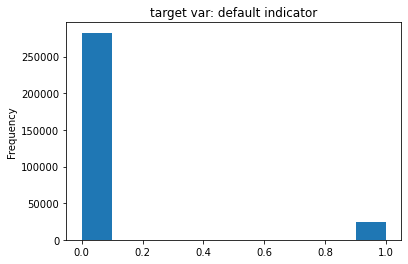

In [7]:
train['TARGET'].plot.hist(title = 'target var: default indicator')

In [8]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

2) The mean and 75% percentile of number of children are 0.417052 and 1. There are some **outliers** we can remove before building the model.

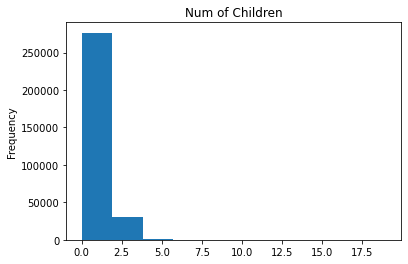

In [9]:
train['CNT_CHILDREN'].plot.hist(title = 'Num of Children')

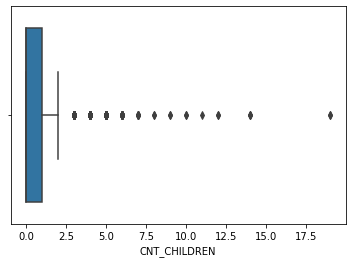

In [10]:
sns.boxplot(x=train['CNT_CHILDREN'])

3) Visualization of some other significant features

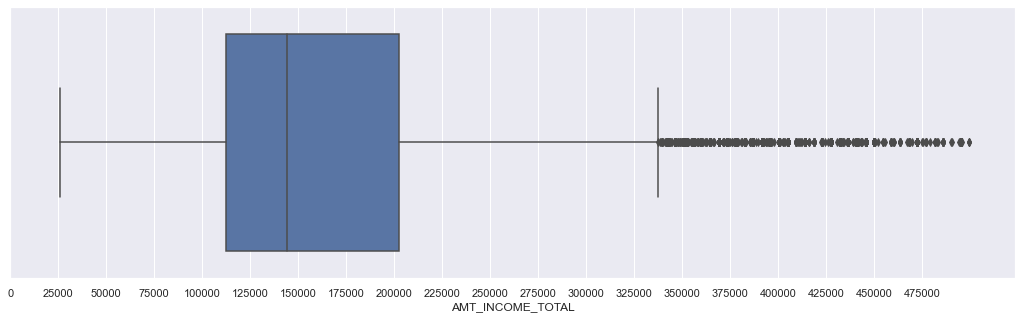

In [11]:
sns.set(rc={'figure.figsize':(18,5)})
ax = sns.boxplot(x=train[train.AMT_INCOME_TOTAL < 0.05e+07]['AMT_INCOME_TOTAL'])
ax.set_xticks(range(0,500000,25000))
ax

Text(0, 0.5, 'Frequency')

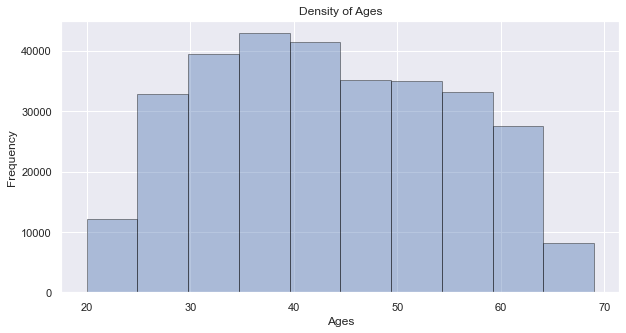

In [12]:
ages = [int(-x/365) for x in train.DAYS_BIRTH]
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(ages, hist=True, kde=False, 
             bins=10,hist_kws={'edgecolor':'black'})
plt.title('Density of Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')

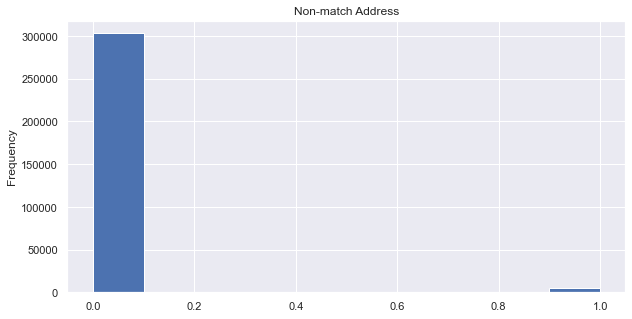

In [13]:
train['REG_REGION_NOT_LIVE_REGION'].plot.hist(title = 'Non-match Address')

## Categorical Vars

object column NAME_CONTRACT_TYPE have 2 unique values
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-------------
object column CODE_GENDER have 3 unique values
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-------------
object column FLAG_OWN_CAR have 2 unique values
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
-------------
object column FLAG_OWN_REALTY have 2 unique values
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
-------------
object column NAME_TYPE_SUITE have 7 unique values
object column NAME_INCOME_TYPE have 8 unique values
object column NAME_EDUCATION_TYPE have 5 unique values
object column NAME_FAMILY_STATUS have 6 unique values
object column NAME_HOUSING_TYPE have 6 unique values
object column OCCUPATION_TYPE have 18 unique values
object column WEEKDAY_APPR_PROCESS_START have 7 unique values
object column ORGANIZATION_TYPE have 58 unique values
object column FONDKAPREMONT_M

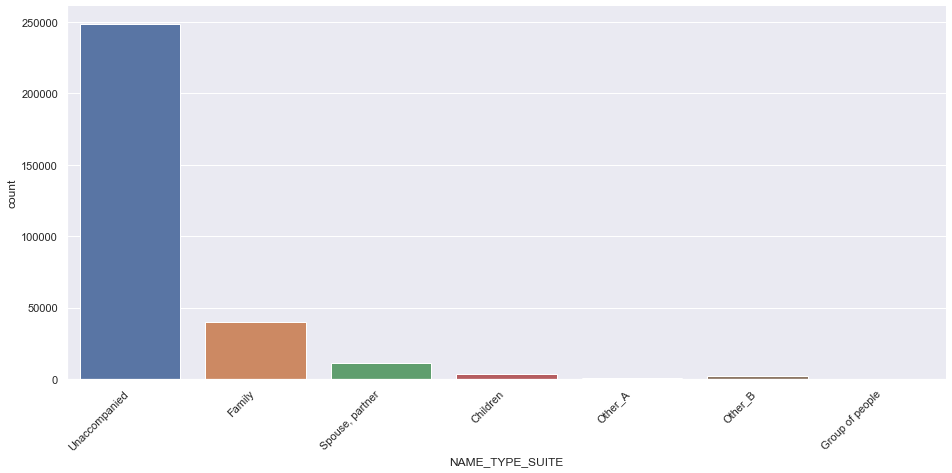

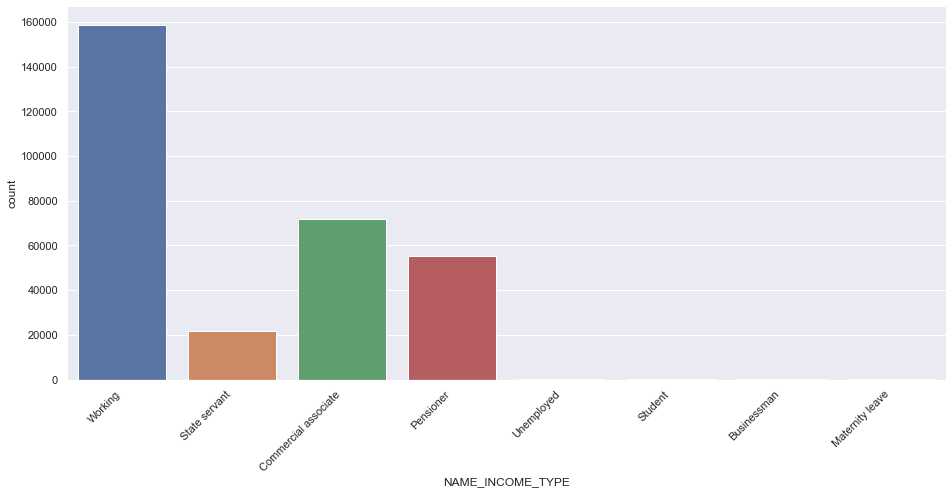

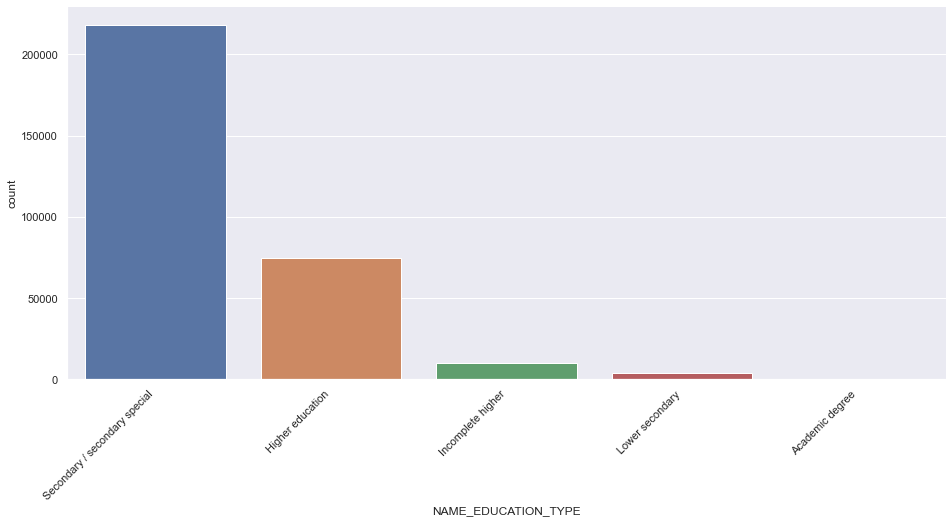

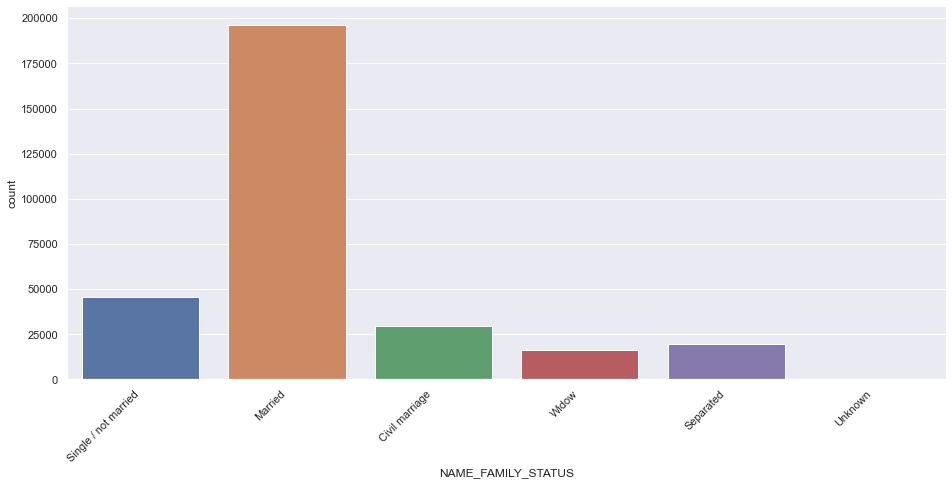

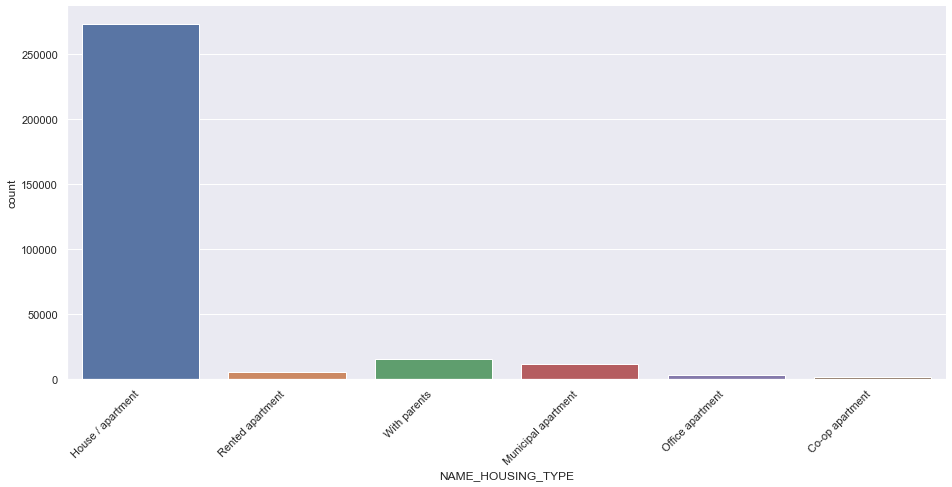

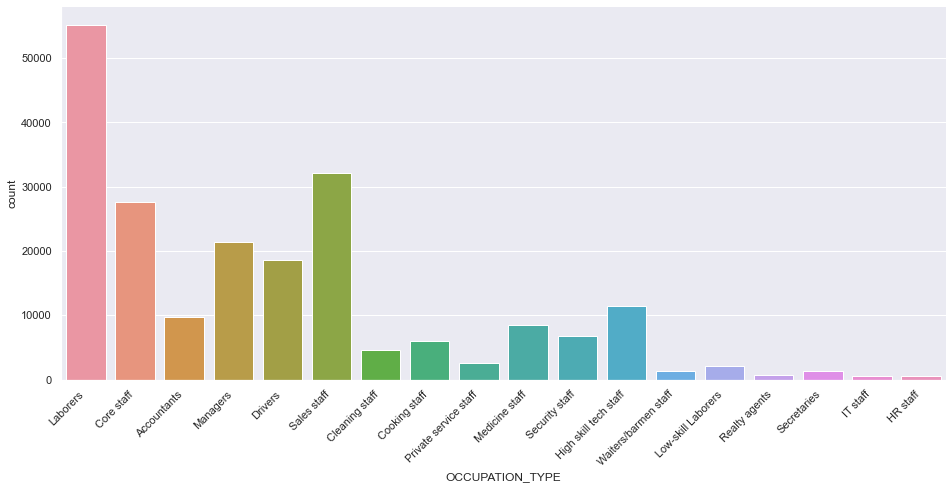

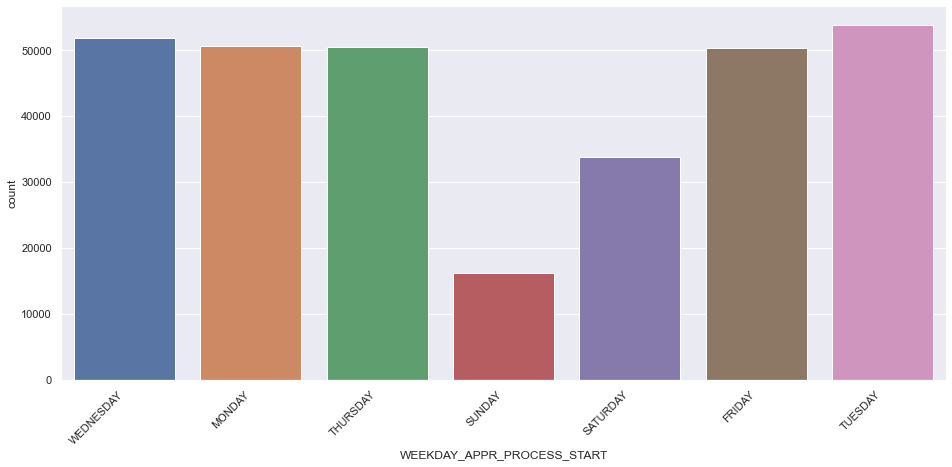

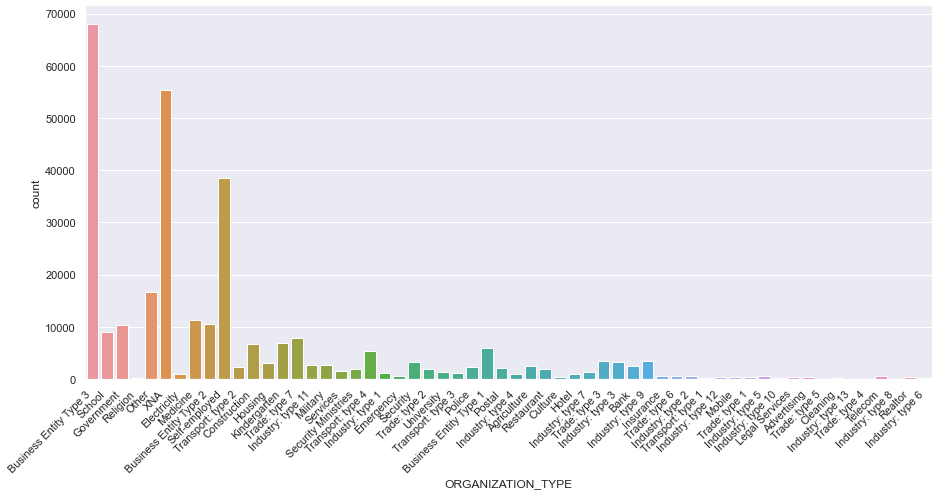

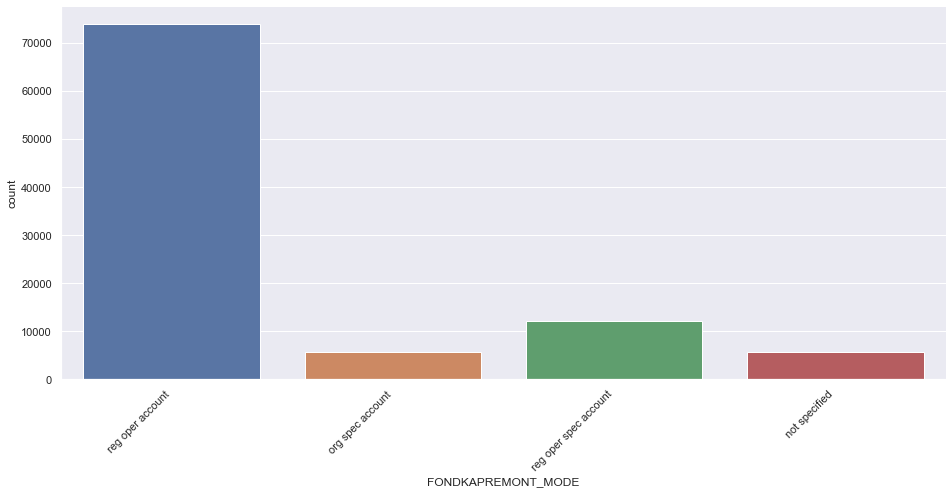

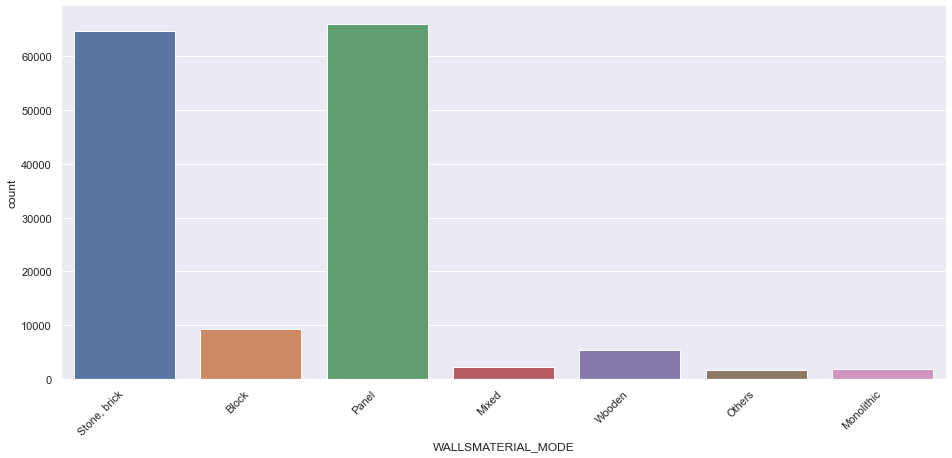

In [14]:
for col in train.columns:
    if train[col].dtype == 'object':
        print("object column %s have %s unique values"%(str(col),train[col].nunique()))
        if train[col].nunique() <= 3:
            print(train[col].value_counts())
            print('-------------')
        else:
            ax = sns.catplot(x=col, kind="count", data=train,height=6, aspect=2.2)
            for axes in ax.axes.flat:
                axes.set_xticklabels(axes.get_xticklabels(),rotation = 45,horizontalalignment = 'right')

## Visualization - Credit Card Balance & Installments Payments

In [15]:
cc.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [16]:
pmts.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


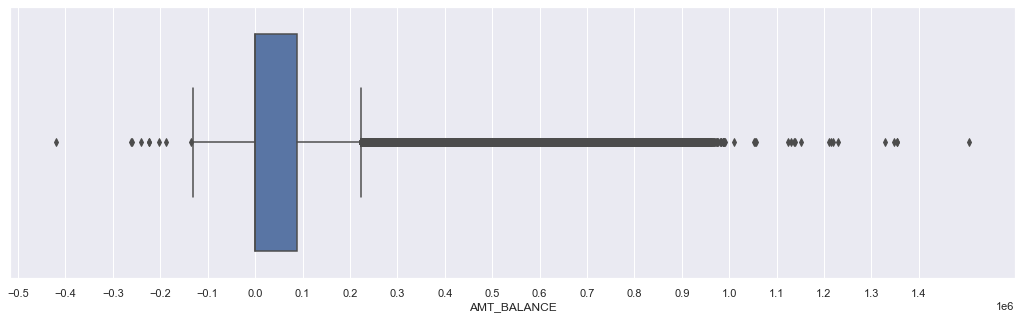

In [17]:
sns.set(rc={'figure.figsize':(18,5)})
ax = sns.boxplot(x=cc['AMT_BALANCE'])
ax.set_xticks([x/10*1e6 for x in range(-5,15,1)])
ax

## Prepare Data for modeling

In [18]:
# Feature Engineering and extract attributes for use from Credit Card Balance & Installments Payments
cc['AMT_DRAWINGS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
cc['AMT_DRAWINGS_ATM_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_ATM_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
cc['AMT_DRAWINGS_OTHER_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_OTHER_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
cc['AMT_DRAWINGS_POS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_POS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]

cc['AMT_PRINCIPAL_RECEIVABLE_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_RECEIVABLE_PRINCIPAL,cc.AMT_RECIVABLE)]

cc_use = cc.groupby(['SK_ID_CURR'],as_index=False).agg({'AMT_BALANCE': np.mean,
                                                        'AMT_DRAWINGS_PCT':np.mean,
                                                        'AMT_DRAWINGS_ATM_PCT':np.mean,
                                                        'AMT_DRAWINGS_OTHER_PCT':np.mean,
                                                        'AMT_DRAWINGS_POS_PCT':np.mean,
                                                        'AMT_PRINCIPAL_RECEIVABLE_PCT':np.mean,
                                                        'CNT_DRAWINGS_ATM_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_OTHER_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_POS_CURRENT':np.mean,
                                                        'SK_DPD':np.mean,
                                                        'SK_DPD_DEF':np.mean})
pmts['DAYS_INSTALMENT_DIFF'] = pmts['DAYS_INSTALMENT'] - pmts['DAYS_ENTRY_PAYMENT']
pmts['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(pmts.AMT_PAYMENT,pmts.AMT_INSTALMENT)]
pmts_use = pmts.groupby(['SK_ID_CURR'],as_index=False).agg({'DAYS_INSTALMENT_DIFF':np.mean,
                                                            'AMT_PATMENT_PCT':np.mean})                                                          

In [19]:
# Remove vars that has too many missing variable
cols_remove = train.columns[train.isnull().sum() > 100000]
train_use = train.drop(cols_remove,axis=1)

# Remove outliers
train_use = train_use[(train_use.CNT_CHILDREN <= 5) & (train_use.AMT_INCOME_TOTAL <= 350000)]

# Merge Credit Card Balance & Installment Payments
train_use = train_use.merge(cc_use,on='SK_ID_CURR',how='left')
train_use = train_use.merge(pmts_use,on='SK_ID_CURR',how='left')

# Missing Value Imputation - Assign an extreme value
train_use = train_use.fillna(-999)

# One-hot encoding for categorical variable
cat_cols = [key for key in dict(train_use.dtypes) if dict(train_use.dtypes)[key] in ['object']]
cat_cols_df = pd.get_dummies(train_use[cat_cols],drop_first=True)
train_use = pd.concat([cat_cols_df,train_use[train_use.columns[~train_use.columns.isin(cat_cols)]]], axis = 1)

# print(train_use.shape)
train_use = train_use[train_use.columns[~train_use.columns.isin(cat_cols)]]

# Remove ID column
train_use = train_use.drop(['SK_ID_CURR'],axis=1).reset_index(drop=True)
train_use.replace([np.inf, -np.inf], np.nan, inplace=True)

train_use.shape

(293604, 188)

## Build Model

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [21]:
X = train_use.drop(['TARGET'],axis=1).copy()
y = train_use['TARGET'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [24]:
# Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [25]:
#Regarding train data
no_of_samples_tr = X_train.shape[0]             
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr                
                                  

In [26]:
#Regarding test data
no_of_samples_test = X_test.shape[0]           
input_features = X_test.shape[1]               
channels = 1
batch_size_test = no_of_samples_test           

In [27]:
#Reshape input train/test data as required by Keras for conv1D:

train = X_train.values.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.values.reshape(( no_of_samples_test, input_features, channels))

In [28]:
train.shape   
test.shape

(205522, 187, 1)

(88082, 187, 1)

In [29]:
 # Design model

# Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])   # (8,1)
                        )


In [30]:
# Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [31]:
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [32]:
# Add convolution layers to right arm

x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)


x_rt = layers.Conv1D(
                      filters = 128,
                      kernel_size=3,
                      activation='relu'
                    )(x_rt)

In [33]:
# Concatenate layers & Flatten:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [34]:
x = layers.Flatten()(x)

In [35]:
# Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [36]:
# Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [37]:
# Create model now
model1 = Model(inputs = [inputs], outputs = [out])

In [38]:
# Display model now

plot_model(model1, show_shapes= True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [39]:
# Compile model
model1.compile(
                 loss = "mean_squared_error",
                 optimizer='adam'
              )  

In [40]:
history = model1.fit(
                    train,
                    y_train,
                    epochs = 2,
                    verbose = 1
                    )

Epoch 1/2
6423/6423 [==============================] - 363s 56ms/step - loss: 0.0823
Epoch 2/2
6423/6423 [==============================] - 393s 61ms/step - loss: 0.0818


Lesser epochs due to machine limitations

In [41]:
model1.evaluate(test,y_test)  

2753/2753 [==============================] - 49s 17ms/step - loss: 0.0817


0.0817306637763977